## Seattle Airbnb Analysis
For this project, I was interested in using the Seattle Airbnb dataset to better understand:
1. [Which factors influence the rental price?](#Question-1:-Which-factors-influence-the-rental-price?)  
2. [How Do Prices Change Over the Months?](#Question-2:-How-Do-Prices-Change-Over-the-Months?)  
3. [What is the most popular neighbourhood in Seattle based on listings?](#Question-3:-What-is-the-most-popular-neighbourhood-in-Seattle-based-on-listings?)

So let's start to explore the provided datsets...

In [2]:
# Read data and necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

calendar_df = pd.read_csv('./calendar.csv')
listings_df = pd.read_csv('./listings.csv')
reviews_df = pd.read_csv('./reviews.csv')

**Explore the calendar data**

In [4]:
# Show the first five rows of the calendar DataFrame

calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
# Display a summary of the calendar DataFrame with the number non-null values, data types of each column, and memory usage

calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


**Explore the listings data**

In [7]:
# Show the first five rows of the listings DataFrame

listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
# Display a summary of the listings DataFrame with the number non-null values, data types of each column, and memory usage

listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [9]:
# Show summary of key metrics such as count, mean, standard deviation, minimum, percentiles, and maximum values

listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


**Explore the reviews data**

In [11]:
# Show the first five rows of the review DataFrame

reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [12]:
# Display a summary of the review DataFrame with the number non-null values, data types of each column, and memory usage

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Question 1: Which factors influence the rental price?

In [14]:
# Show all headers of the listings DataFrame for the Feature Selection

listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [15]:
# Show all columns of the listings DataFrame with the first five rows

# Set Pandas display option to show all columns in the DataFrame without truncation
pd.options.display.max_columns = None

listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

While examining all columns and the contents of the first five rows, it becomes apparent that certain columns have a greater influence on the rental price than others. To reduce complexity, the dataset will be filtered to the essential parameters to enable an efficient data analysis.

In [17]:
# Filter listings dataset by expected relevant columns  

listings_df_filtered = listings_df[["price", "host_acceptance_rate", "host_is_superhost", "host_identity_verified", "neighbourhood", 
                  "room_type", "bathrooms", "bedrooms", "amenities", "accommodates", "square_feet", "guests_included", "minimum_nights",
                  "number_of_reviews", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin",
                  "review_scores_communication", "review_scores_location", "review_scores_value", "cancellation_policy", "reviews_per_month"]]

In [18]:
# Display a summary of the filtered listings DataFrame with the number non-null values, data types of each column, and memory usage

listings_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        3818 non-null   object 
 1   host_acceptance_rate         3045 non-null   object 
 2   host_is_superhost            3816 non-null   object 
 3   host_identity_verified       3816 non-null   object 
 4   neighbourhood                3402 non-null   object 
 5   room_type                    3818 non-null   object 
 6   bathrooms                    3802 non-null   float64
 7   bedrooms                     3812 non-null   float64
 8   amenities                    3818 non-null   object 
 9   accommodates                 3818 non-null   int64  
 10  square_feet                  97 non-null     float64
 11  guests_included              3818 non-null   int64  
 12  minimum_nights               3818 non-null   int64  
 13  number_of_reviews 

Although the parameter square_feet might seemingly have a dependency on the rental price, it is only provided for very few values and therefore cannot be used meaningfully. The feature square_feet is therefore not further used for the analysis. That should be no problem because other features as bathrooms or bedrooms have a similar influence and also correspond to the size of the appartment. All other parameters have more than 3000 entries and are available in a sufficient quantity.

In [20]:
# Change price from object to float64 by removing the $ sign

# Create a copy of the filtered listings DataFrame first
listings_df_filtered = listings_df_filtered.copy()

# Replace the $ sign and the , in the column price and change the Dtype to float64
listings_df_filtered['price'] = listings_df_filtered['price'].replace(r'[\$,]', '', regex=True).astype(float)

Before having a deeper look into the different parameters let's check how the price distribution look like:

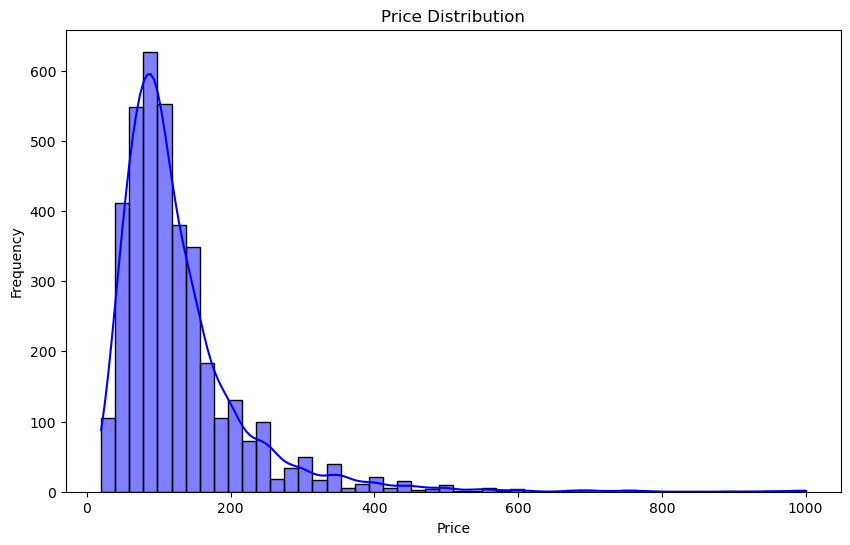

In [22]:
# Investigate the Price Distribution

plt.figure(figsize=(10, 6)) # Set the figure size to 10x6 inches
sns.histplot(listings_df_filtered['price'], kde=True, color='blue', bins=50)  # Create the histogram
plt.title('Price Distribution')  # Set the title of the plot
plt.xlabel('Price')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.show()  # Display the plot

### Explore the numeric features

To start the analyses, the filtered listings dataset is reduced to the numeric parameters to check ina simple correlation heatmap the dependencies from the different numeric parameters to the price

In [25]:
# Create a dataframe containing only the numeric features

listings_df_numeric = listings_df_filtered.select_dtypes(include=['number'])

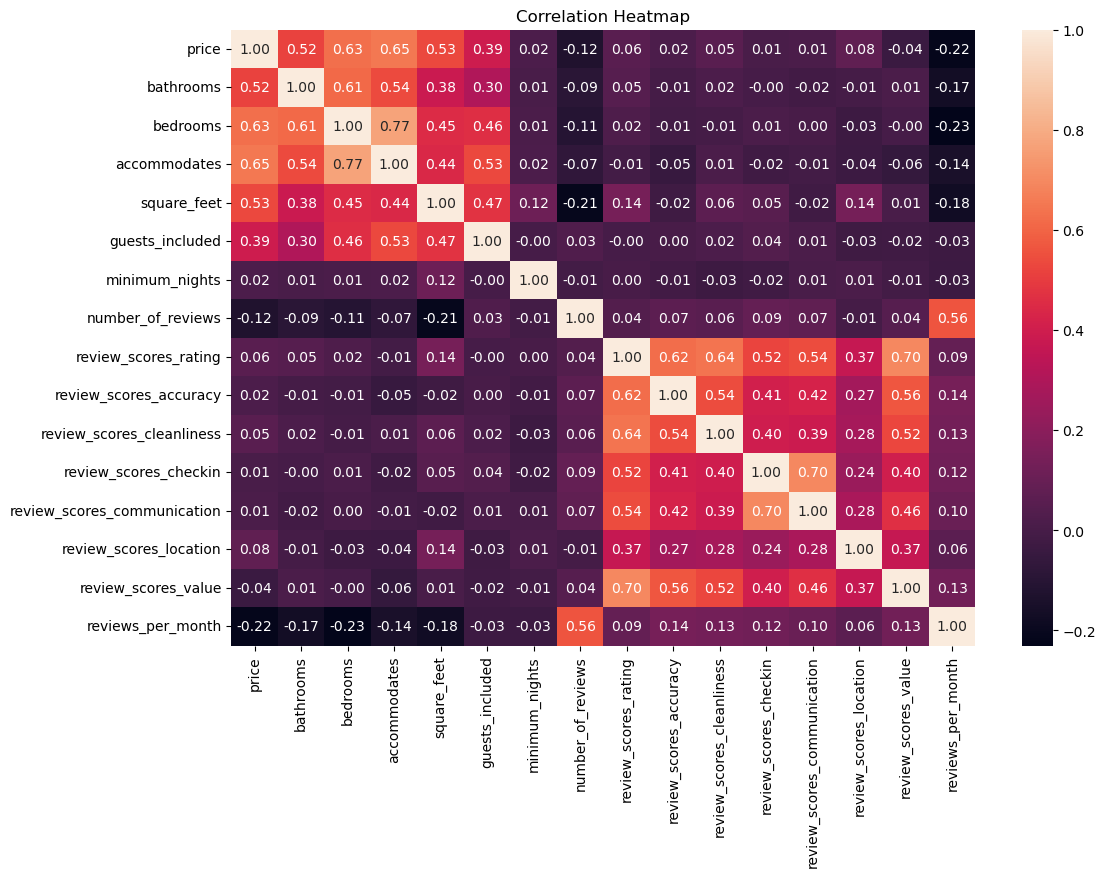

In [26]:
# Explore correlation heatmap

plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches
sns.heatmap(listings_df_numeric.corr(), annot=True, fmt='.2f')  # Generate the heatmap of correlation values between numerical features
plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()  # Display the plot

**According to the Correlation Heatmap there is a strong positive correlation to the following features:**
- bathrooms
- bedrooms
- accommodates
- square_feet
- guests_included

**And a noticable negative correlation to these ones:**
- number_of_reviews
- reviews_per_month

So let's have a deeper look into some of these features...

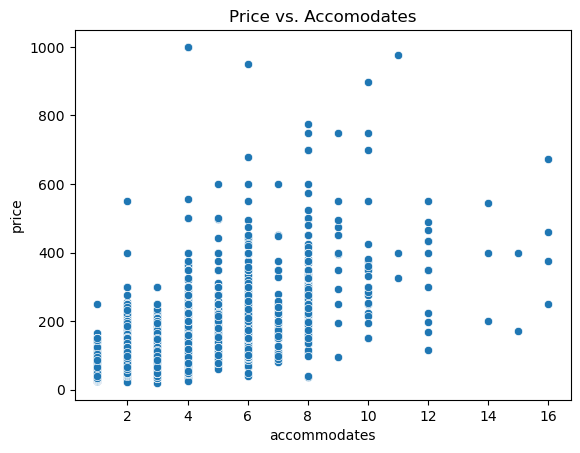

In [28]:
# Scatter plot of price vs. accommodates

sns.scatterplot(data=listings_df_filtered, x='accommodates', y='price')  # Create the scatterplot
plt.title('Price vs. Accomodates')  # Set the title of the plot
plt.show()  # Display the plot

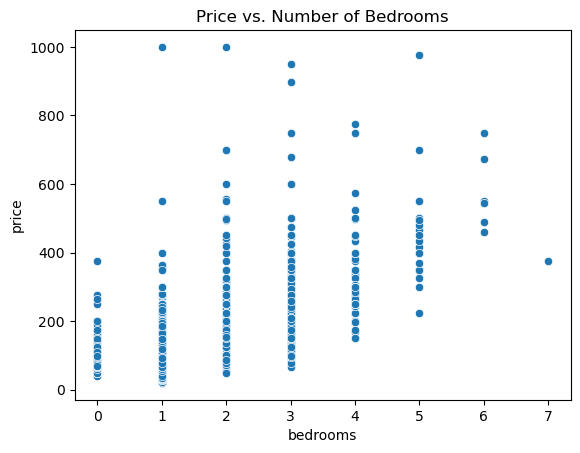

In [29]:
# Scatter plot of price vs. number of bedrooms

sns.scatterplot(data=listings_df_filtered, x='bedrooms', y='price')  # Create the scatterplot
plt.title('Price vs. Number of Bedrooms')  # Set the title of the plot
plt.show()  # Display the plot

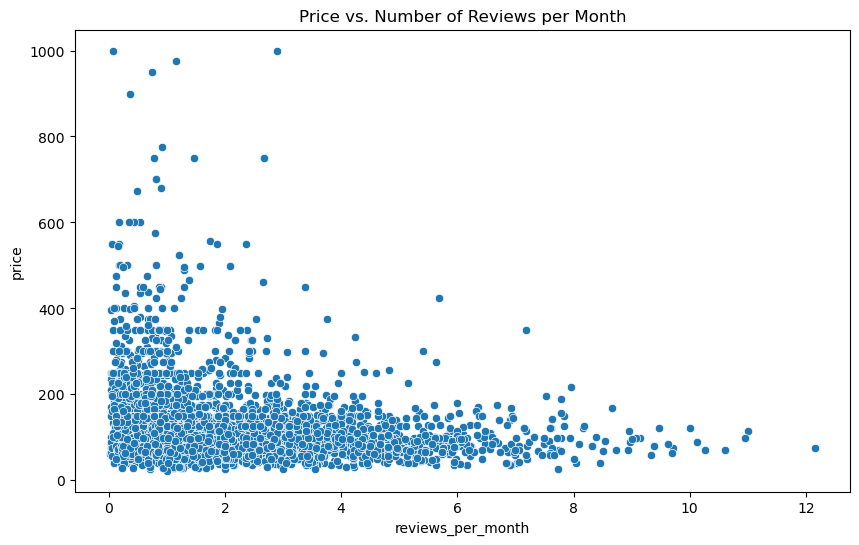

In [30]:
# Scatter plot of price vs. number of reviews per month

plt.figure(figsize=(10, 6))  # Set the figure size to 10x6 inches
sns.scatterplot(data=listings_df_filtered, x='reviews_per_month', y='price')  # Create the scatterplot
plt.title('Price vs. Number of Reviews per Month')  # Set the title of the plot
plt.show()  # Display the plot

As expected, a larger number of beds, bathrooms, or guests generally leads to higher rental prices, as these accommodations are often larger and/or more luxurious.

The negative correlation with the number of reviews may be due to the fact that more expensive houses are booked less frequently and therefore receive fewer reviews compared to cheaper apartments, which are more affordable for a larger number of people.

### Explore the categorical features

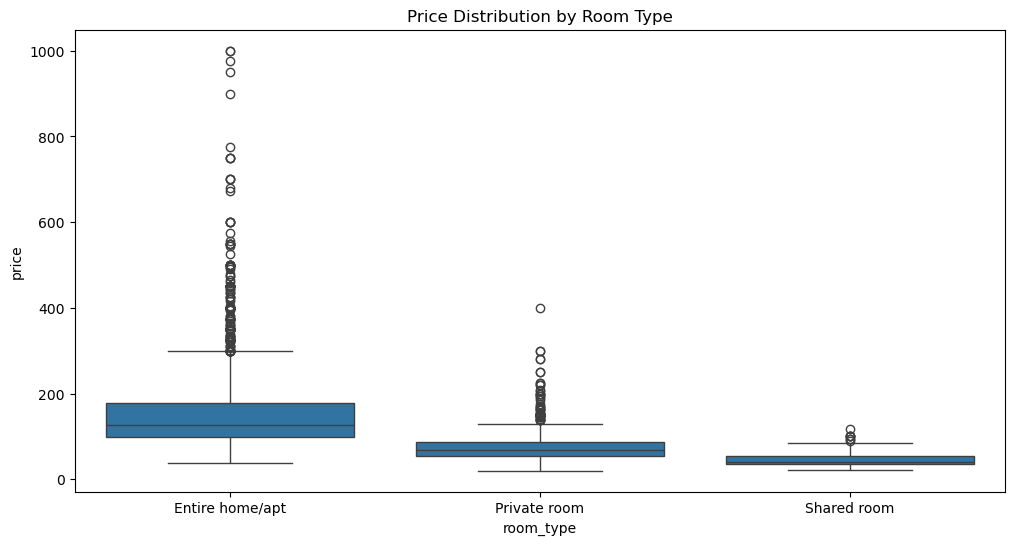

In [33]:
# Boxplot of price by room type

plt.figure(figsize=(12, 6))  # Set the figure size to 12x6 inches
sns.boxplot(data=listings_df_filtered, x='room_type', y='price')  # Create the boxplot
plt.title('Price Distribution by Room Type')  # Set the title of the plot
plt.show()  # Display the plot

Entire home/apt are as expacted more expensive than private rooms and these again more expensive than shared rooms. That's reasonable because the most expensive listings are often luxury apartments or large houses. Private rooms are cheaper because guests usually share comman areas and shared rooms are the most affordable option since guests share the whole space with others.

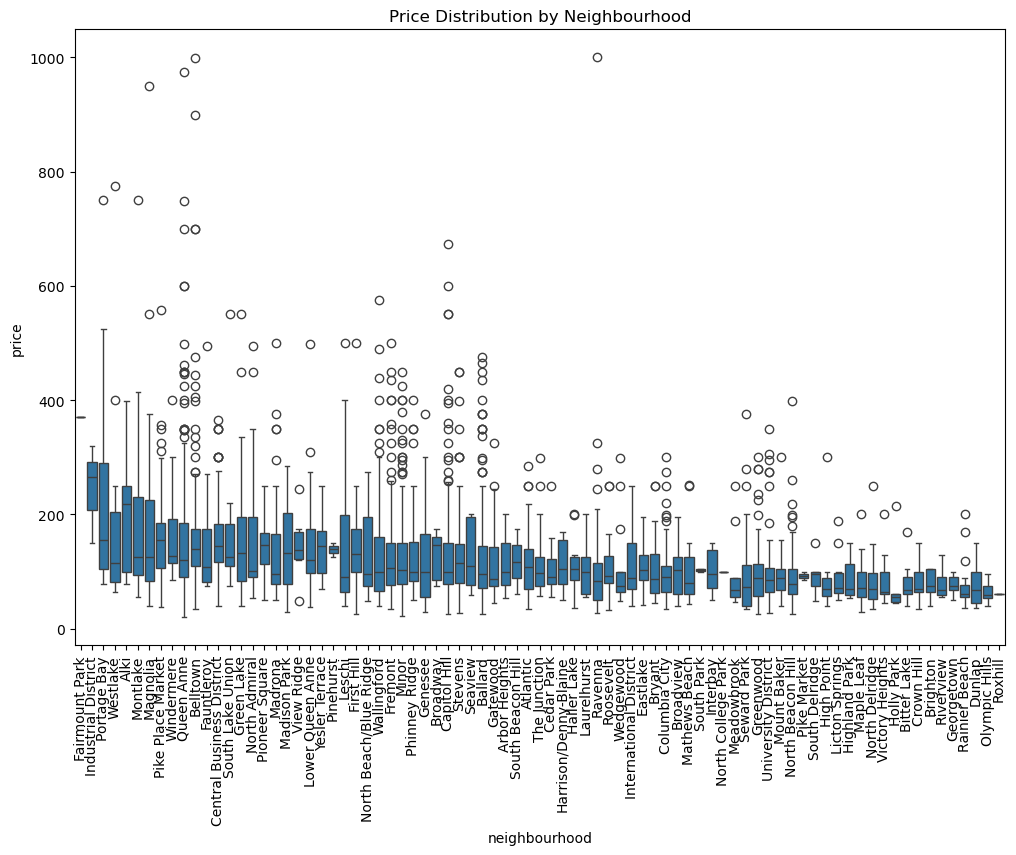

In [35]:
# Price Distribution by Neighbourhood sorted by mean price

# Sort neighbourhoods by their average price in descending order
sorted_neighbourhoods = listings_df_filtered.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches
sns.boxplot(data=listings_df_filtered, x='neighbourhood', y='price', order=sorted_neighbourhoods)  # Create the boxplot
plt.title('Price Distribution by Neighbourhood')  # Set the title of the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()  # Display the plot

The neighbourhood has a significant impact on rental prices in the Seattle Airbnb dataset. Several general patterns can be observed:
- central and popular neighbourhoods are more expensive, e.g. Queen Anne
- waterfront or scenic views can increase the price, e.g. Westlake or Alki
- suburbs are more affordable

In [37]:
# Select amenities and price columns
listings_df_amenities = listings_df_filtered[['amenities', 'price']].copy()

# Split comma-separated values into lists
listings_df_amenities['amenities'] = listings_df_amenities['amenities'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

# Flatten the list of amenities into a single list
all_amenities = [item.strip() for sublist in listings_df_amenities['amenities'] for item in sublist]

# Count the frequency of each amenity
amenity_counts = pd.Series(all_amenities).value_counts()

# Display the most common amenities
print(amenity_counts.head())

Heating                3611
Kitchen                3380
"Wireless Internet"    3342
"Smoke Detector"       3254
Washer                 2990
Name: count, dtype: int64


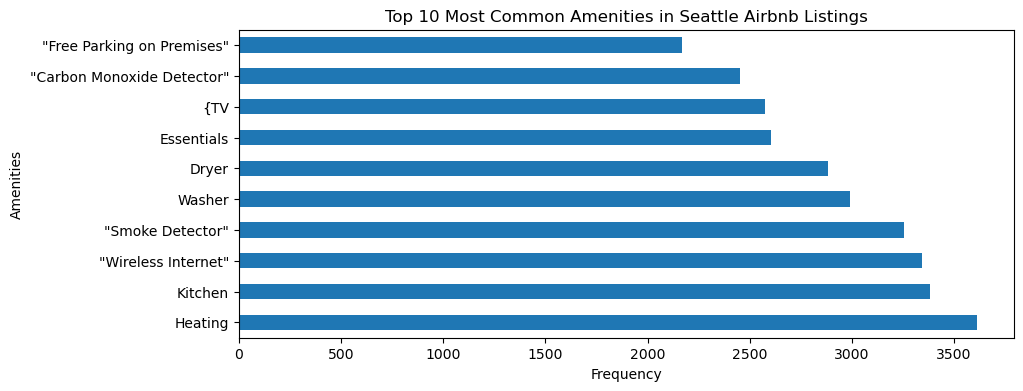

In [38]:
# Select the top 10 most common amenities
top_amenities = amenity_counts.head(10)

# Create a bar chart
plt.figure(figsize=(10, 4))  # Set the figure size to 10x4 inches
top_amenities.plot(kind='barh')  # Create the bar chart
plt.title('Top 10 Most Common Amenities in Seattle Airbnb Listings')  # Set the title of the plot
plt.xlabel('Frequency')  # Label for the x-axis
plt.ylabel('Amenities')  # Label for the y-axis
plt.show()  # Display the plot

In [39]:
# Calculate the average price per amenity

# Initialize an empty list to store amenities and their associated price data
amenities_price_list = []

# For each amenity, calculate the average price
for amenity in amenity_counts.index:
    mask = listings_df_amenities['amenities'].apply(lambda x: amenity in x)
    avg_price = listings_df_amenities[mask]['price'].mean()
    
    # Append the amenity and average price to the list
    amenities_price_list.append({'amenity': amenity, 'average_price': avg_price})

# Convert the list into a DataFrame
amenities_price = pd.DataFrame(amenities_price_list)

# Sort the data by average price
amenities_price = amenities_price.sort_values(by='average_price', ascending=False)

# Display the top 10 amenities with the highest average price
print(amenities_price.head(10))

                  amenity  average_price
66         "Safety Card"}     230.000000
44                Doorman     200.258824
41                   Pool     171.468354
35              "Hot Tub"     167.029703
38  "Suitable for Events"     160.918269
15             "Cable TV"     157.999218
63      {"Smoke Detector"     157.500000
32                    Gym     156.346154
24     "Air Conditioning"     153.494083
17     "Indoor Fireplace"     152.406780


Some of the amenities that are mentioned in the list above are typical amenities for luxury houses like a Doorman, a private Pool or a Hot Tub. Of course houses with these amenities tend to be more expensive and have therefore higher rental prices.

In [41]:
# Convert remaining categorical variables to numerical using one-hot encoding

# Remove the 'amenities' column from the dataset
listings_df_filtered = listings_df_filtered.drop(columns=['amenities'])

# Convert categorical variables into dummy/one-hot encoded variables
listings_df_filtered = pd.get_dummies(listings_df_filtered, columns=['host_acceptance_rate','host_is_superhost','host_identity_verified',
        'neighbourhood','room_type','cancellation_policy'], drop_first=True)

In [42]:
listings_df_filtered

,price,bathrooms,bedrooms,accommodates,square_feet,guests_included,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_acceptance_rate_100%,host_is_superhost_t,host_identity_verified_t,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Ballard,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Bryant,neighbourhood_Capitol Hill,neighbourhood_Cedar Park,neighbourhood_Central Business District,neighbourhood_Columbia City,neighbourhood_Crown Hill,neighbourhood_Dunlap,neighbourhood_Eastlake,neighbourhood_Fairmount Park,neighbourhood_Fauntleroy,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Gatewood,neighbourhood_Genesee,neighbourhood_Georgetown,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Haller Lake,neighbourhood_Harrison/Denny-Blaine,neighbourhood_High Point,neighbourhood_Highland Park,neighbourhood_Holly Park,neighbourhood_Industrial District,neighbourhood_Interbay,neighbourhood_International District,neighbourhood_Laurelhurst,neighbourhood_Leschi,neighbourhood_Licton Springs,neighbourhood_Lower Queen Anne,neighbourhood_Madison Park,neighbourhood_Madrona,neighbourhood_Magnolia,neighbourhood_Maple Leaf,neighbourhood_Mathews Beach,neighbourhood_Meadowbrook,neighbourhood_Minor,neighbourhood_Montlake,neighbourhood_Mount Baker,neighbourhood_North Admiral,neighbourhood_North Beach/Blue Ridge,neighbourhood_North Beacon Hill,neighbourhood_North College Park,neighbourhood_North Delridge,neighbourhood_Olympic Hills,neighbourhood_Phinney Ridge,neighbourhood_Pike Market,neighbourhood_Pike Place Market,neighbourhood_Pinehurst,neighbourhood_Pioneer Square,neighbourhood_Portage Bay,neighbourhood_Queen Anne,neighbourhood_Rainier Beach,neighbourhood_Ravenna,neighbourhood_Riverview,neighbourhood_Roosevelt,neighbourhood_Roxhill,neighbourhood_Seaview,neighbourhood_Seward Park,neighbourhood_South Beacon Hill,neighbourhood_South Delridge,neighbourhood_South Lake Union,neighbourhood_South Park,neighbourhood_Stevens,neighbourhood_The Junction,neighbourhood_University District,neighbourhood_Victory Heights,neighbourhood_View Ridge,neighbourhood_Wallingford,neighbourhood_Wedgewood,neighbourhood_Westlake,neighbourhood_Windermere,neighbourhood_Yesler Terrace,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
0,85.0,1.0,1.0,4,NaN,2,1,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,150.0,1.0,1.0,4,NaN,1,2,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,975.0,4.5,5.0,11,NaN,10,4,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [43]:
# Calculate correlation with price

# Set the Pandas display option to show all rows (no truncation)  
pd.set_option('display.max_rows', None)

# Compute the correlation of all numerical features with the 'price' column 
correlation = listings_df_filtered.corr()['price'].sort_values(ascending=False)

# Print the correlation values, sorted in descending order 
print(correlation)

price                                      1.000000
accommodates                               0.652218
bedrooms                                   0.627720
square_feet                                0.531752
bathrooms                                  0.516424
guests_included                            0.392875
cancellation_policy_strict                 0.226632
neighbourhood_Queen Anne                   0.102578
neighbourhood_Belltown                     0.101764
neighbourhood_Portage Bay                  0.076272
review_scores_location                     0.075069
neighbourhood_Magnolia                     0.064340
neighbourhood_Central Business District    0.058330
review_scores_rating                       0.055551
review_scores_cleanliness                  0.054357
neighbourhood_Pike Place Market            0.053516
neighbourhood_Montlake                     0.053269
neighbourhood_Fairmount Park               0.043412
neighbourhood_Westlake                     0.042950
neighbourhoo

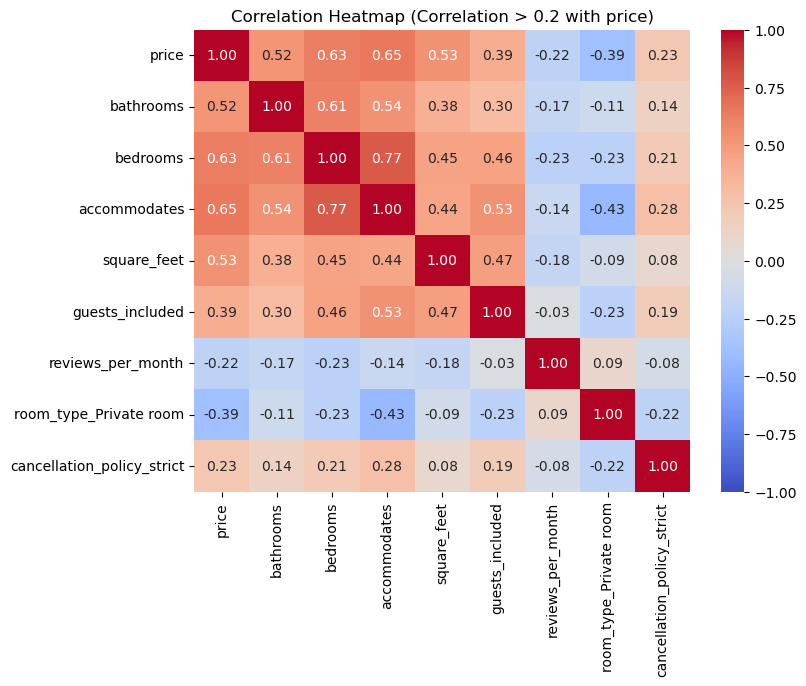

In [44]:
# Calculate the correlation matrix for the numeric columns
corr_matrix = listings_df_filtered.corr()

# Select only the columns with a correlation > 0.2 with 'price'
corr_with_price = corr_matrix['price']
filtered_columns = corr_with_price[abs(corr_with_price) > 0.2].index

# Create a new correlation matrix for the filtered columns
filtered_corr_matrix = corr_matrix.loc[filtered_columns, filtered_columns]

# Create the heatmap for the filtered columns
plt.figure(figsize=(8, 6))  # Set the figure size to 8x6 inches
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)  # Generate the heatmap of correlation values
plt.title('Correlation Heatmap (Correlation > 0.2 with price)')  # Set the title of the plot
plt.show()  # Display the plot

The other categorical parameters in the dataset, which were transformed using one-hot encoding, do not show a high correlation with the rental price. It seems that we have already identified the most important parameters. So lets continue with a short try of predicting prices with these parameters.

### Question 1.1: How to predict the price of a listing?

In [47]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

In [48]:
# Prepare the data (select relevant features as analysed before)

# Define a list of features (columns) that will be used for prediction
features = ['neighbourhood', 'room_type', 'bathrooms', 'bedrooms', 
            'accommodates', 'guests_included']

# Create a new DataFrame 'prediction_df' that includes the specified features and the 'price' column for prediction
prediction_df = listings_df[features + ['price']]

In [49]:
# Change price from object to float64 by removing the $ sign

# Create a copy of the prediction DataFrame first
prediction_df = prediction_df.copy()

# Replace the $ sign and the , in the column price and change the Dtype to float64
prediction_df['price'] = prediction_df['price'].replace(r'[\$,]', '', regex=True).astype(float)

In [50]:
# Display a summary of the prediction DataFrame with the number non-null values, data types of each column, and memory usage

prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   neighbourhood    3402 non-null   object 
 1   room_type        3818 non-null   object 
 2   bathrooms        3802 non-null   float64
 3   bedrooms         3812 non-null   float64
 4   accommodates     3818 non-null   int64  
 5   guests_included  3818 non-null   int64  
 6   price            3818 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 208.9+ KB


In [51]:
# Drop all the rows with missing values because except of very few examples they are only missing in the neighbourhood column,
# which is important to keep and it is not reasonable to fill these values using another method.

prediction_df = prediction_df.dropna()

In [52]:
# Convert categorical variables into numerical using one-hot encoding

prediction_df = pd.get_dummies(prediction_df, columns=['neighbourhood', 'room_type'], drop_first=True)

In [53]:
# Split the data into features (X) and target (y)

X = prediction_df.drop(columns=['price'])
y = prediction_df['price']

In [54]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Initialize a regressor model (try GradientBoostingRegressor because of good experiences in the past) with a standard setup for the hyperparameters

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

In [56]:
# Train the model on the training data

model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [57]:
# Make predictions on the test set

y_pred = model.predict(X_test)

In [58]:
# Calculate Root Mean Squared Error

rmse = root_mean_squared_error(y_test, y_pred)

In [59]:
# Calculate R-squared

r2 = r2_score(y_test, y_pred)

In [60]:
# Display the results

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 59.84092669925062
R-squared: 0.6019506331412138


With an RMSE of around 60, the prediction accuracy of this simple model is quite high. To achieve better results, a deeper analysis of all parameters and further tuning of the prediction model would be necessary.

## Question 2: How Do Prices Change Over the Months?

In [63]:
# Show the first five rows of the calendar DataFrame

calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [64]:
# Display a summary of the calendar DataFrame with the number non-null values, data types of each column, and memory usage

calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [65]:
# Which columns have no missing values?

# Identify the columns in 'calendar_df' that have no missing (NaN) values across all rows
no_nulls = set(calendar_df.columns[calendar_df.notna().all()])

# Print the list of columns that have no null values
print(no_nulls)

{'date', 'available', 'listing_id'}


In [66]:
# Is the price always given when the availability is true?

# Filter the 'calendar_df' DataFrame to include only rows where 'available' is 't' (true)
calendar_df_filtered = calendar_df[calendar_df['available'] == 't']

# Identify the columns in 'calendar_df_filtered' that have no missing (NaN) values across all rows
no_nulls = set(calendar_df_filtered.columns[calendar_df_filtered.notna().all()])

# Print the list of columns that have no null values in the filtered DataFrame
print(no_nulls)

{'date', 'price', 'available', 'listing_id'}


In [67]:
# Convert 'date' in datetime format

calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [68]:
# Extract year and month from the 'date' column

calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['month'] = calendar_df['date'].dt.month

In [69]:
# Change price from object to float64 by removing the $ sign

calendar_df = calendar_df.copy()
calendar_df['price'] = calendar_df['price'].replace(r'[\$,]', '', regex=True).astype(float)

In [70]:
# Calculate the average price per month

monthly_price = calendar_df.groupby(['year', 'month'])['price'].mean().reset_index()

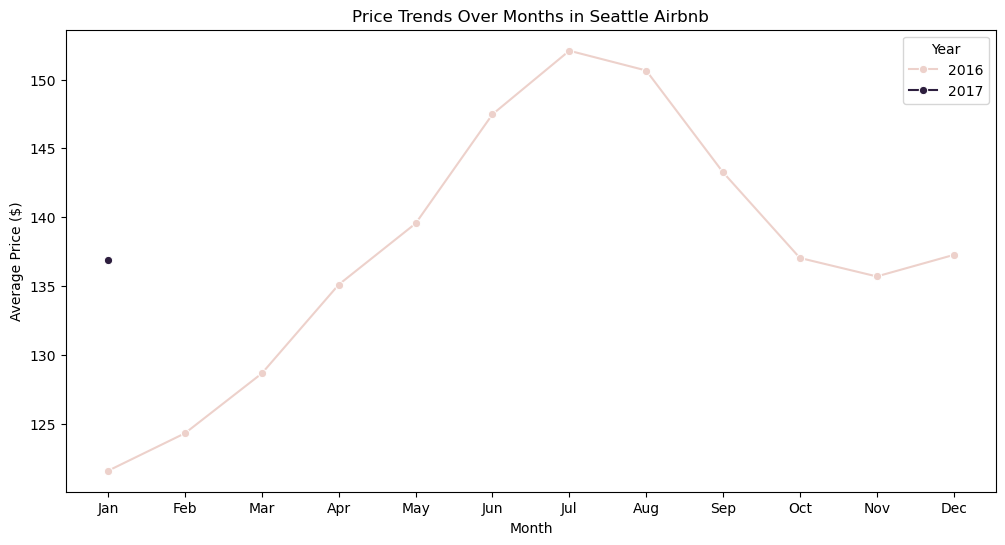

In [71]:
# Visualize the price trends over the months

plt.figure(figsize=(12, 6))  # Set the figure size to 12x6 inches
sns.lineplot(data=monthly_price, x='month', y='price', hue='year', marker='o')  # Create the line plot
plt.title('Price Trends Over Months in Seattle Airbnb')  # Set the title of the plot
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Average Price ($)')  # Label for the y-axis
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-tick for the months
plt.legend(title='Year')  # Add a legend
plt.show()  # Display the plot

- Airbnb prices in Seattle steadily increase from January to July with a peak at around $152 --> strong summer tourism
- Prices start to decline from August and hit a low in November --> lower demand in fall/winter
- There is a slight recovery in December --> due to holiday season, Christmas, New Year

In [73]:
# Availability: Calculate the availability rate per month

# Convert the 'available' column to numerical values (1 for 't' and 0 for 'f')
calendar_df['available'] = calendar_df['available'].map({'t': 1, 'f': 0})

# Group the data by 'year' and 'month', and calculate the mean availability for each group
monthly_availability = calendar_df.groupby(['year', 'month'])['available'].mean().reset_index()

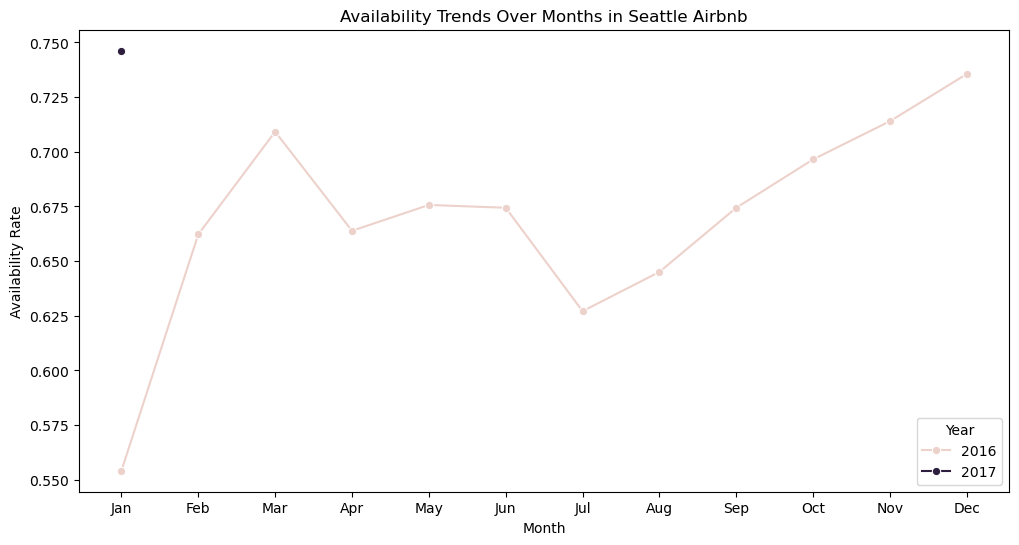

In [74]:
# Visualize the availability trends over the months

plt.figure(figsize=(12, 6))  # Set the figure size to 12x6 inches
sns.lineplot(data=monthly_availability, x='month', y='available', hue='year', marker='o', color='orange')  # Create the line plot
plt.title('Availability Trends Over Months in Seattle Airbnb')  # Set the title of the plot
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Availability Rate')  # Label for the y-axis
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-tick for the months
plt.legend(title='Year')  # Add a legend
plt.show()  # Display the plot

- The availability rate starts low in January (0.55) but rises sharply in February and peaks in March (0.71) --> low demand in spring
- After March, availability fluctuates slightly, with a dip in July (0.62) --> high demand in summer
- From July, availability increases steadily, reaching its highest point in December (0.74) --> low demand in winter

--> The inverse relationship between price and availability suggests higher demand in summer (low availability, high prices) and lower demand in winter (high availability, lower prices).

## Question 3: What is the most popular neighbourhood in Seattle based on listings?

In [77]:
# Group by neighborhood and count the number of listings

neighborhood_listing_counts = listings_df.groupby('neighbourhood')['id'].count().reset_index()

In [78]:
# Sort the neighborhoods by the number of bookings

neighborhood_listing_counts = neighborhood_listing_counts.sort_values(by='id', ascending=False)

In [79]:
# Show only the top 20 neighborhoods

top_20_neighborhoods = neighborhood_listing_counts.head(30)

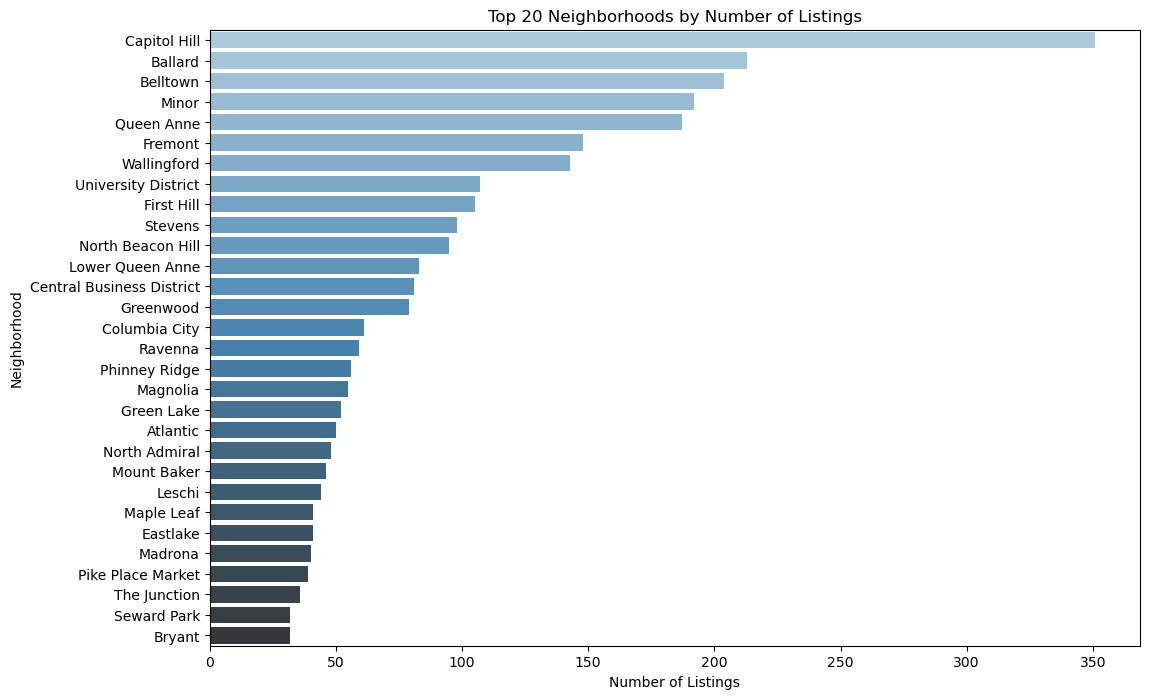

In [80]:
# Visualize the results with a bar plot

plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches
sns.barplot(data=top_20_neighborhoods, x='id', y='neighbourhood', hue='neighbourhood', palette='Blues_d', legend=False)  # Create the bar plot
plt.title('Top 20 Neighborhoods by Number of Listings')  # Set the title of the plot
plt.xlabel('Number of Listings')  # Label for the x-axis
plt.ylabel('Neighborhood')  # Label for the y-axis
plt.show()  # Display the plot

- Capitol Hill has the highest number of Airbnb listings, significantly more than any other neighborhood
- Ballard, Belltown, Minor, and Queen Anne follow with a high number of listings
- Fremont, Wallingford, and University District have a moderate number of listings, suggesting they are also popular but not as competitive as the top neighborhoods
- The neighborhoods at the bottom of the list, such as Pike Place Market, The Junction, Seward Park, and Bryant, have the fewest listings among the top 20

**Potential Insights for Hosts and Renters:**
- Hosts: High-listing areas like Capitol Hill and Ballard may have more competition, requiring competitive pricing and better amenities to attract guests
- Renters: These areas may offer more options and better pricing due to competition, while lower-listing areas might provide a more unique, less crowded experience